In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Compute model Libraties
from sklearn import metrics
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

In [2]:
books = pd.read_csv(r"C:\Users\kopri\OneDrive\Documents\DSTI\Python_lab\Project\Book_Hrv.csv", on_bad_lines = "skip")

In [3]:
pwd

'C:\\Users\\kopri'

In [4]:

print ( books.head() )



   bookID                                              title  \
0       1  Harry Potter and the Half-Blood Prince (Harry ...   
1       2  Harry Potter and the Order of the Phoenix (Har...   
2       4  Harry Potter and the Chamber of Secrets (Harry...   
3       5  Harry Potter and the Prisoner of Azkaban (Harr...   
4       8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors  average_rating        isbn        isbn13  \
0  J.K. Rowling/Mary GrandPr?            4.57  0439785960  9.780440e+12   
1  J.K. Rowling/Mary GrandPr?            4.49  0439358078  9.780440e+12   
2                J.K. Rowling            4.42  0439554896  9.780440e+12   
3  J.K. Rowling/Mary GrandPr?            4.56  043965548X  9.780440e+12   
4  J.K. Rowling/Mary GrandPr?            4.78  0439682584  9.780440e+12   

  language_code  num_pages  ratings_count  text_reviews_count  \
0           eng        652        2095690             27591.0   
1           eng        870        

In [5]:
# Dataset composition (first and last 4 rows)
books.fillna(4)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPr?,4.57,0439785960,9.780440e+12,eng,652,2095690,27591.0,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPr?,4.49,0439358078,9.780440e+12,eng,870,2153167,29221.0,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9.780440e+12,eng,352,6333,244.0,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPr?,4.56,043965548X,9.780440e+12,eng,435,2339585,36325.0,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPr?,4.78,0439682584,9.780440e+12,eng,2690,41428,164.0,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.781560e+12,eng,512,156,20.0,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9.780140e+12,eng,635,783,56.0,12/1/1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9.780140e+12,eng,415,820,95.0,8/1/1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9.780060e+12,eng,434,769,139.0,2/27/2007,Ecco


In [6]:
# Number of records in the dataset is 11127
total_records = len(books['bookID'])
print( "Record cnt: {}".format( total_records ) )

Record cnt: 11127


In [7]:
For # Statistical analysis of dataset
books.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11123.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,542.048099
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780350e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780590e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.135000,9.780870e+12,416.000000,4.993500e+03,238.000000
max,45641.000000,5.000000,9.790010e+12,6576.000000,4.597666e+06,94265.000000


In [9]:
#Description of dataser:Datatypes,Count,Column
books.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11126 non-null  object 
 5   isbn13              11127 non-null  float64
 6   language_code       11123 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11123 non-null  float64
 10  publication_date    11125 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.0+ MB


In [10]:
# Check for null values
books.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  1
isbn13                0
language_code         4
num_pages             0
ratings_count         0
text_reviews_count    4
publication_date      2
publisher             4
dtype: int64

In [8]:
# First clean parsing errors (publishers separated with comma)
# Need to replace, but maybe leave value as array, this will help with title duplicates, they can also be stored in array
# This is fucking mess!!!!
for i in range( len( books.publisher ) ):
    if type( books.publisher[i] ) != 'str':
        # books[i].__setitem__( 'publisher', 'none' )
        print( books['publisher'][i] )
        break

Scholastic Inc.


In [12]:
# Drop the columns isbn and isbn13, because it has no impact on the target variable "Average rating"
books = books.drop(["isbn","isbn13"],axis=1)

In [13]:
# Pick the language_code as series and then convert it into a Set
# Join the Language codes: en-US, en-GB,en-CA to eng
list_of_lang = set(books["language_code"])
list_of_lang

{'ale',
 'ara',
 'en-CA',
 'en-GB',
 'en-US',
 'eng',
 'enm',
 'fre',
 'ger',
 'gla',
 'glg',
 'grc',
 'ita',
 'jpn',
 'lat',
 'msa',
 'mul',
 nan,
 'nl',
 'nor',
 'por',
 'rus',
 'spa',
 'srp',
 'swe',
 'tur',
 'wel',
 'zho'}

In [13]:
# Looking for distinct values for language_code, and when there are different codes with the same meaning we merge in one.
books.language_code.value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

In [14]:
# Form in the columm an uniformity  'language_code' by looping through the list
for i in list_of_lang:
    if i == "English":
        books.loc[books['language_code'] == i,"language_code"] = "eng"
    elif i == "en-US":
        books.loc[books['language_code'] == i,"language_code"] = "eng"
    elif i == "en-CA":
        books.loc[books['language_code'] == i,"language_code"] = "eng"  
    elif i == "en-GB":
        books.loc[books['language_code'] == i,"language_code"] = "eng"
    elif i == "French":
       books.loc[books['language_code'] == i,"language_code"] = "fre"

In [15]:
# Explore the distinct values for language_code after merging same Language code
books.language_code.value_counts()

eng    10537
spa      218
fre      144
ger       99
jpn       46
mul       19
zho       14
grc       11
por       10
ita        5
lat        3
enm        3
rus        2
swe        2
nl         1
ara        1
srp        1
msa        1
glg        1
wel        1
nor        1
tur        1
gla        1
ale        1
Name: language_code, dtype: int64

In [16]:
# Look for null values in publication date
books.loc[books.publication_date.isna(),:]

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
8180,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,eng,718,10608,295.0,NaN,Bantam Books
11098,45531,Montaillou village occitan de 1294 � 13,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,fre,640,15,2.0,NaN,Folio histoire


In [17]:
# Number of DataFrame rows and columns (including NA elements)
books.shape

(11127, 10)

In [18]:
#mozda OD PRIJ DRUGI KOD UPOTRIJBIT ZA TO
# Determine records with the same title but without null publication date. To replace the null date. 
books[books['title'].str.contains('Montaillou', na=False)]

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11096,45529,Montaillou: The Promised Land of Error,Emmanuel Le Roy Ladurie/Barbara Bray,3.96,eng,416,1142,62.0,7/12/1979,Vintage/Random House (NY)
11097,45530,Montaillou: Cathars and Catholics in a French ...,Emmanuel Le Roy Ladurie/Barbara Bray,3.96,eng,400,80,14.0,12/5/2002,Penguin
11098,45531,Montaillou village occitan de 1294 � 13,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,fre,640,15,2.0,NaN,Folio histoire
11099,45533,Montaillou: Cathars and Catholics in a French ...,Emmanuel Le Roy Ladurie/Barbara Bray,3.96,eng,400,17,2.0,5/29/1980,Penguin Books Ltd.


In [19]:
# Clean the column "publication_date"
#Remove the records that have publication_date null
books = books.loc[books['publication_date'].notna(),:]

In [20]:
# Clean incorrect date value 
books.loc[books['publication_date']=="1/1/1900 0:00","publication_date"]

Series([], Name: publication_date, dtype: object)

In [21]:
# Convert object/string to date type
books.loc[:,"Date"] = pd.to_datetime(books['publication_date'])

In [22]:
# Select month from the date  
books['month'] = books['Date'].dt.month

In [23]:
# Select year from the date
books['year'] = books['Date'].dt.year

In [24]:
# View the data types
books.dtypes

bookID                         int64
title                         object
authors                       object
average_rating               float64
language_code                 object
num_pages                      int64
ratings_count                  int64
text_reviews_count           float64
publication_date              object
publisher                     object
Date                  datetime64[ns]
month                          int64
year                           int64
dtype: object

In [25]:
# View the dataframe after data cleaning
books.head()

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Date,month,year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPr?,4.57,eng,652,2095690,27591.0,9/16/2006,Scholastic Inc.,2006-09-16,9,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPr?,4.49,eng,870,2153167,29221.0,9/1/2004,Scholastic Inc.,2004-09-01,9,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244.0,11/1/2003,Scholastic,2003-11-01,11,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPr?,4.56,eng,435,2339585,36325.0,5/1/2004,Scholastic Inc.,2004-05-01,5,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPr?,4.78,eng,2690,41428,164.0,9/13/2004,Scholastic,2004-09-13,9,2004


In [26]:
# Drop the columns "publication_date" and "Date", because it has been transformed to year and month 
books = books.drop(["publication_date","Date"],axis=1)

In [27]:
# Clean the column "Authors"

In [28]:
# Form a function to identify "/,C" in the column "Authors"
def Update_strings(name):
    if name.find("/") != -1:
      author_name = name.split("/")[0]
    elif name.find("(") != -1:
      author_name = name.split("(")[0]  
    else:
      author_name = name
    return author_name
   

In [29]:
# Transform the "author" column information to have only one author by picking the first name before the '/' or '('
books.loc[:,"authors"] = books.loc[:,"authors"].apply(Update_strings)

In [30]:
#Clean the column "Title"

In [31]:
# Form function to replace special characters such as "!$%^&*" with white space and also '&' with and
def processString(txt):
  specialCharacters = "!$%^&*¡¿" 
  for specialChar in specialCharacters:
    if specialChar == '&':
        txt = txt.replace('&',' and ') 
    else:
        txt = txt.replace(specialChar, ' ')
  return txt

In [32]:
# Update the title column data to bring uniformity to the column "title"
books.loc[:,"New_title"]= books.loc[:,"title"].apply(processString)

In [33]:
# Replace double white spaces with single white space
books['New_title'] = books['New_title'].str.replace('  ',' ')

In [34]:
# Form a new title column name: new_title to pick the first name of the title
books.loc[:,"New_title"]= books.loc[:,"New_title"].apply(Update_strings)

In [35]:
# The number of counts for each title
books.title.value_counts()

The Iliad                                      9
The Brothers Karamazov                         9
Gulliver's Travels                             8
The Odyssey                                    8
Anna Karenina                                  8
                                              ..
Wildwood Dancing (Wildwood  #1)                1
The Noonday Demon: An Atlas of Depression      1
The Noonday Demon: An Anatomy of Depression    1
My Secret: A PostSecret Book                   1
Las aventuras de Tom Sawyer                    1
Name: title, Length: 10349, dtype: int64

In [36]:
# Check for null values
books.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
language_code         4
num_pages             0
ratings_count         0
text_reviews_count    4
publisher             4
month                 0
year                  0
New_title             0
dtype: int64

In [37]:
# Look the "title" transformation
books[["title","New_title"]]

,title,New_title
0,Harry Potter and the Half-Blood Prince (Harry ...,Harry Potter and the Half-Blood Prince
1,Harry Potter and the Order of the Phoenix (Har...,Harry Potter and the Order of the Phoenix
2,Harry Potter and the Chamber of Secrets (Harry...,Harry Potter and the Chamber of Secrets
3,Harry Potter and the Prisoner of Azkaban (Harr...,Harry Potter and the Prisoner of Azkaban
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,Harry Potter Boxed Set Books 1-5
...,...,...
11122,Expelled from Eden: A William T. Vollmann Reader,Expelled from Eden: A William T. Vollmann Reader
11123,You Bright and Risen Angels,You Bright and Risen Angels
11124,The Ice-Shirt (Seven Dreams #1),The Ice-Shirt
11125,Poor People,Poor People


In [38]:
# View null values of publisher,text_reviews_count,language_code 
books.loc[books.language_code.isna(),:]

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,month,year,New_title
3348,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,3.58,NaN,236,61,NaN,NaN,4,2004,Streetcar Suburbs: The Process of Growth in Bo...
4702,16914,The Tolkien Fan's Medieval Reader,David E. Smith,3.58,NaN,400,26,NaN,NaN,4,2004,The Tolkien Fan's Medieval Reader
5877,22128,Patriots (The Coming Collapse),James Wesley,3.63,NaN,342,38,NaN,NaN,1,1999,Patriots
8979,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,0.00,NaN,49,0,NaN,NaN,5,1977,Brown's Star Atlas: Showing All The Bright Sta...


In [39]:
# Drop records for null values of "text_reviews_count"
books = books.loc[books['text_reviews_count'].notna(),:]

In [40]:
# Drop records for null values of "language_code"
books = books.loc[books["language_code"].notna(),:]

In [41]:
# Drop the columns publisher from the dataframe
books = books.drop(["publisher"],axis=1)

In [42]:
# View the data types for the columns
books.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count    float64
month                   int64
year                    int64
New_title              object
dtype: object

In [43]:
# Replace the "title" column with "new_title" and drop the colum
books.loc[:,"title"]= books.loc[:,"New_title"].apply(Update_strings)
books = books.drop(["New_title"],axis=1)
books

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,month,year
0,1,Harry Potter and the Half-Blood Prince,J.K. Rowling,4.57,eng,652,2095690,27591.0,9,2006
1,2,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.49,eng,870,2153167,29221.0,9,2004
2,4,Harry Potter and the Chamber of Secrets,J.K. Rowling,4.42,eng,352,6333,244.0,11,2003
3,5,Harry Potter and the Prisoner of Azkaban,J.K. Rowling,4.56,eng,435,2339585,36325.0,5,2004
4,8,Harry Potter Boxed Set Books 1-5,J.K. Rowling,4.78,eng,2690,41428,164.0,9,2004
...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann,4.06,eng,512,156,20.0,12,2004
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56.0,12,1988
11124,45634,The Ice-Shirt,William T. Vollmann,3.96,eng,415,820,95.0,8,1993
11125,45639,Poor People,William T. Vollmann,3.72,eng,434,769,139.0,2,2007


Text(0.5, 1.0, 'Boxplot of count of average rating')

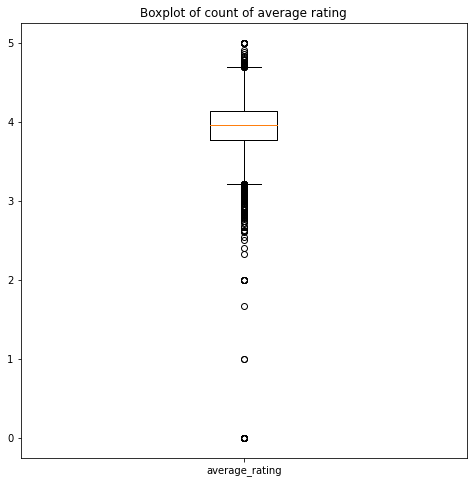

In [44]:
plt.subplots(figsize=(8,8))
plt.boxplot(books.average_rating)
plt.xticks([1], ["average_rating"])
plt.title("Boxplot of count of average rating")

array([[<AxesSubplot:title={'center':'average_rating'}>]], dtype=object)

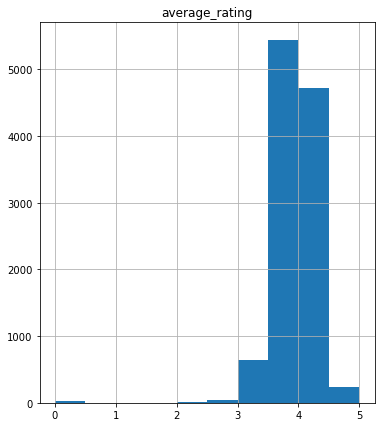

In [52]:
### This is the histogram for 'average_rating', It is target for the modelling.
### Very concentrated around 3.5 - 4.5

books.hist(column="average_rating",figsize=(6,7))

Text(0, 0.5, 'Frequency')

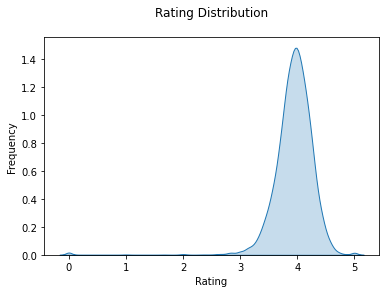

In [45]:
# Distributional ratings 
sns.kdeplot(books['average_rating'], shade = True)
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

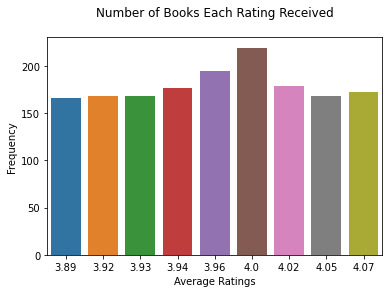

In [46]:
# Counts average ratings of top 9
sns.barplot(x=books['average_rating'].value_counts().head(9).index,y=books['average_rating'].value_counts().head(9))
plt.title('Number of Books Each Rating Received\n')
plt.xlabel('Average Ratings')
plt.ylabel('Frequency')
# plt.xticks(rotation=50)

Text(0.5, 0, 'Total Ratings')

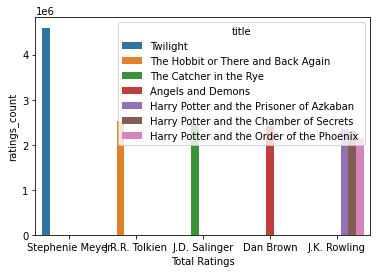

In [48]:
# Authors with top rated books
authors = books.nlargest(7, ['ratings_count']).set_index('authors')
sns.barplot(y=authors['ratings_count'], x=authors.index, ci = None, hue = authors['title'])
plt.xlabel('Total Ratings')

C:\Users\kopri\anaconda3\envs\Project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ratings_count', ylabel='title'>

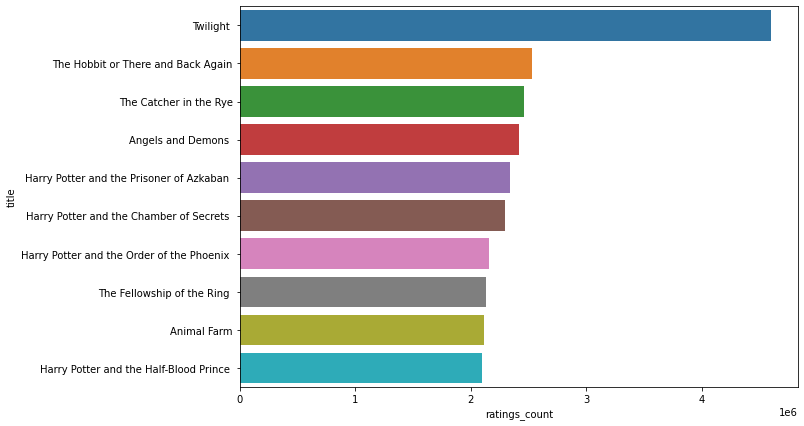

In [53]:
# This barplot shows us the most reviewed books in the dataset, with the first Twilight taking the number 1 spot by a mile.

MostReviewedBooks = books.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(MostReviewedBooks, MostReviewedBooks.index)

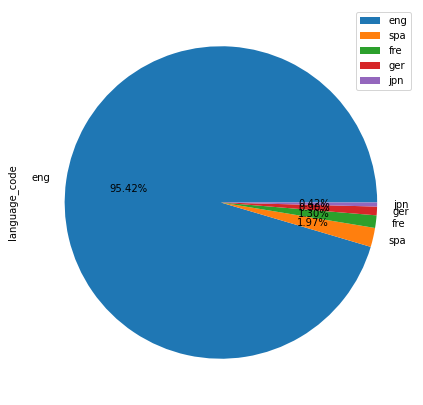

In [47]:
# Top 5 languages
books['language_code'].value_counts().head(5).plot(kind = 'pie', autopct='%1.2f%%', figsize=(7, 8)).legend()

In [49]:
# Look for a mean(average_rating) from dataframe books_df with group by "title" 
title_avg_rat_df = books.groupby(["title"])["average_rating"].mean()
# Convert the groupby result into a dataframe
title_df = title_avg_rat_df.to_frame().reset_index()
# Sort by title and average_rating
title_df.sort_values(["average_rating","title"],ascending=[False,True]).head(10)

,title,average_rating
1016,Bill Gates: Computer Legend,5.0
1257,Bulgakov's the Master and Margarita: The Text ...,5.0
1600,Colossians and Philemon: A Critical and Exeget...,5.0
1616,Comoediae 1: Acharenses,5.0
1931,Delwau Duon: Peintiadau Nicholas Evans = Symph...,5.0
2521,Fanning the Flame: Bible Cross and Mission,5.0
3244,His Princess Devotional: A Royal Encounter Wit...,5.0
4156,Literature Circle Guide: Bridge to Terabithia:...,5.0
4565,Middlesex Borough,5.0
5059,Oliver Wendell Holmes in Paris: Medicine Theol...,5.0


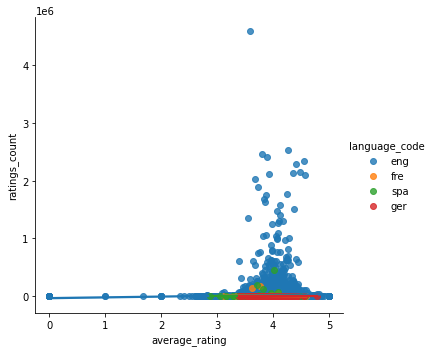

In [50]:
# Find the relationship between Average_rating and num_pages with repect to the language code
df_lang=books.loc[(books['language_code'] == 'spa') | (books['language_code'] == 'fre') | (books['language_code'] == 'eng') | (books['language_code'] == 'ger')]

sns.lmplot(x="average_rating", y="ratings_count",hue = "language_code",data=df_lang);

 Displaying the correlation between the features in following heatmap:


<AxesSubplot:>

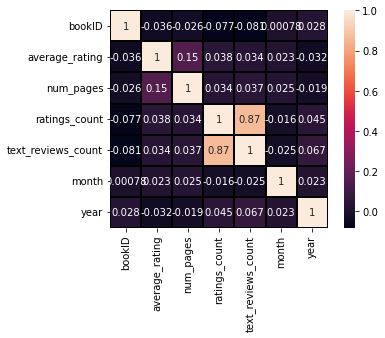

In [54]:
#We see a high correlation between the ratings_count and the text_reviews_count (~ 81%). 
#From this we can conclude that when a person writes a review he/she will most likely also rate the book itself.print(" Displaying the correlation between the features in following heatmap:")
sns.heatmap(data=books.corr(),
            linewidths=0.25, square=True,
            linecolor="black", annot=True)

array([[<AxesSubplot:title={'center':'bookID'}>]], dtype=object)

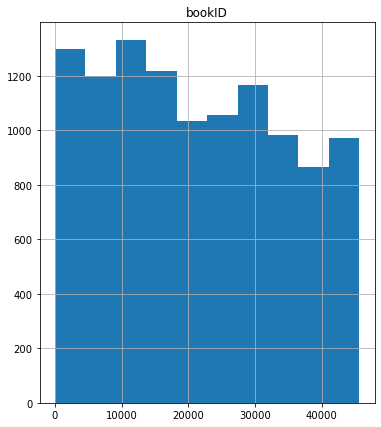

In [51]:
books.hist(column="bookID",figsize=(6,7))

In [56]:
most_rated = books.sort_values(by="ratings_count", ascending = False).head(10)

most_rated_titles = pd.DataFrame(most_rated.title).join(pd.DataFrame(most_rated.ratings_count))
most_rated_titles

,title,ratings_count
10340,Twilight,4597666
1697,The Hobbit or There and Back Again,2530894
1462,The Catcher in the Rye,2457092
307,Angels and Demons,2418736
3,Harry Potter and the Prisoner of Azkaban,2339585
4416,Harry Potter and the Chamber of Secrets,2293963
1,Harry Potter and the Order of the Phoenix,2153167
23,The Fellowship of the Ring,2128944
2114,Animal Farm,2111750
0,Harry Potter and the Half-Blood Prince,2095690


In [57]:
#3. Model Training and Evaluation
#Transform categorical data to numeric

In [58]:
books


,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,month,year
0,1,Harry Potter and the Half-Blood Prince,J.K. Rowling,4.57,eng,652,2095690,27591.0,9,2006
1,2,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.49,eng,870,2153167,29221.0,9,2004
2,4,Harry Potter and the Chamber of Secrets,J.K. Rowling,4.42,eng,352,6333,244.0,11,2003
3,5,Harry Potter and the Prisoner of Azkaban,J.K. Rowling,4.56,eng,435,2339585,36325.0,5,2004
4,8,Harry Potter Boxed Set Books 1-5,J.K. Rowling,4.78,eng,2690,41428,164.0,9,2004
...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann,4.06,eng,512,156,20.0,12,2004
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56.0,12,1988
11124,45634,The Ice-Shirt,William T. Vollmann,3.96,eng,415,820,95.0,8,1993
11125,45639,Poor People,William T. Vollmann,3.72,eng,434,769,139.0,2,2007


In [60]:
# Remove titles that are non ASCII characters
books = books.loc[~((books['title'].str.contains(r'[^\x00-\x7F]')) & ((books['language_code'] == 'jpn') | (books['language_code'] == 'zho')))]

In [61]:
# Select the top 4 counts for "language_code"
processed = books.loc[(books['language_code'] == 'eng') | (books['language_code'] == 'fre') | (books['language_code'] == 'spa') | (books['language_code'] == 'ger')]


In [62]:
# Encoding the "language_code" column by transforming it to 4 columns corresponding to each of its values
processed = pd.concat([processed,pd.get_dummies(processed.language_code)],axis=1).drop(columns="language_code")

In [63]:
# View the dataframe to be used for machine learning
# It has 10996 records and 12 columns
processed

,bookID,title,authors,average_rating,num_pages,ratings_count,text_reviews_count,month,year,eng,fre,ger,spa
0,1,Harry Potter and the Half-Blood Prince,J.K. Rowling,4.57,652,2095690,27591.0,9,2006,1,0,0,0
1,2,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.49,870,2153167,29221.0,9,2004,1,0,0,0
2,4,Harry Potter and the Chamber of Secrets,J.K. Rowling,4.42,352,6333,244.0,11,2003,1,0,0,0
3,5,Harry Potter and the Prisoner of Azkaban,J.K. Rowling,4.56,435,2339585,36325.0,5,2004,1,0,0,0
4,8,Harry Potter Boxed Set Books 1-5,J.K. Rowling,4.78,2690,41428,164.0,9,2004,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann,4.06,512,156,20.0,12,2004,1,0,0,0
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,635,783,56.0,12,1988,1,0,0,0
11124,45634,The Ice-Shirt,William T. Vollmann,3.96,415,820,95.0,8,1993,1,0,0,0
11125,45639,Poor People,William T. Vollmann,3.72,434,769,139.0,2,2007,1,0,0,0


In [64]:
# Convert 'authors' column to numeric
processed['authors'] = pd.factorize(processed['authors'])[0]

In [65]:
# Convert 'title' column to numeric
processed['title'] = pd.factorize(processed['title'])[0]

In [66]:
# View the dataframe again now all columns are numeric which is good for the model to be trained.
processed

,bookID,title,authors,average_rating,num_pages,ratings_count,text_reviews_count,month,year,eng,fre,ger,spa
0,1,0,0,4.57,652,2095690,27591.0,9,2006,1,0,0,0
1,2,1,0,4.49,870,2153167,29221.0,9,2004,1,0,0,0
2,4,2,0,4.42,352,6333,244.0,11,2003,1,0,0,0
3,5,3,0,4.56,435,2339585,36325.0,5,2004,1,0,0,0
4,8,4,0,4.78,2690,41428,164.0,9,2004,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,10137,1469,4.06,512,156,20.0,12,2004,1,0,0,0
11123,45633,10138,1469,4.08,635,783,56.0,12,1988,1,0,0,0
11124,45634,10139,1469,3.96,415,820,95.0,8,1993,1,0,0,0
11125,45639,10140,1469,3.72,434,769,139.0,2,2007,1,0,0,0


In [67]:
# Copy the datafram to csv
processed.to_csv('book_processed_cleaned.csv', index=False)
books.to_csv('books_df_cleaned.csv', index=False)

In [68]:
# Split the data into Train and Test

In [69]:
# Split the data into train and test for the model
from sklearn.model_selection import train_test_split 

In [70]:
# the size of the test is 20% and the train is 80%
df_train, df_test = train_test_split(processed,test_size = 0.2)

In [71]:
# Total records for dataset
len(processed)

10996

In [72]:
# Total records for training the model
len(df_train)

8796

In [73]:
# Total records for testing the model
len(df_test)

2200

In [74]:
# Check the data is ramdomly selected
print(processed.average_rating.mean())
print(df_train.average_rating.mean())
print(df_test.average_rating.mean())

3.9319516187704626
3.930638926784902
3.9372000000000003


In [75]:
# Review the features and the target to be used for the machine learning
df_train.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'num_pages',
       'ratings_count', 'text_reviews_count', 'month', 'year', 'eng', 'fre',
       'ger', 'spa'],
      dtype='object')

In [76]:
#C get the values of the columns for the training data
X_train = df_train.loc[:,['title', 'authors', 'num_pages', 'ratings_count', 'text_reviews_count','year','month','eng','fre','ger','spa']].values
y_train = df_train.average_rating.values.round(1)

In [77]:
# View the values for X_train
print(X_train)

[[6267. 1974.  852. ...    0.    0.    0.]
 [6485. 2717.  311. ...    0.    0.    0.]
 [ 717.   68.  713. ...    0.    0.    0.]
 ...
 [5418. 2306.  144. ...    0.    0.    0.]
 [2456.  651.  372. ...    0.    0.    0.]
 [2038.  458.    9. ...    0.    0.    0.]]


In [78]:
# View the values y_train
print(y_train)

[4.4 4.  4.6 ... 4.4 3.9 4.2]


In [79]:
# get the values of the columns for the test data
X_test = df_test.loc[:,['title', 'authors', 'num_pages', 'ratings_count', 'text_reviews_count','year','month','eng','fre','ger','spa']].values
y_test = df_test.average_rating.values.round(1)

In [80]:
# View the values for X_test
print(X_test)

[[4871. 2137.  279. ...    0.    0.    0.]
 [8652. 3596.  112. ...    0.    0.    0.]
 [4992.   59.  413. ...    0.    0.    0.]
 ...
 [2386.  717.  480. ...    0.    0.    0.]
 [3494. 1598.  179. ...    0.    0.    0.]
 [2859. 1381.  400. ...    0.    0.    0.]]


In [81]:
# View the values y_test
print(y_test)

[3.9 4.3 4.3 ... 4.4 4.4 3.9]


In [82]:
# Train the Model

In [83]:
# importing module: Liner Regression
from sklearn.linear_model import LinearRegression

In [84]:
# creating an object of LinearRegression class
lr_model = LinearRegression()

In [85]:
# here we train the model on the training data
lr_model.fit(X=X_train, y=y_train)

LinearRegression()

In [86]:
#Predict the Target Values

In [87]:
y_test_predicted = lr_model.predict(X_test)

In [88]:
# Approximate to 1 decimal place
y_test_predicted = y_test_predicted.round(1)

In [89]:
# Now compare the actual output values for y_test with the predicted values.
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_test_predicted.tolist()}).head(21)
pred.head(9)

,Actual,Predicted
0,3.9,3.9
1,4.3,3.9
2,4.3,4.0
3,3.1,3.9
4,4.1,3.9
5,4.3,4.0
6,4.2,4.0
7,4.0,3.9
8,4.0,3.9


In [90]:
#Evalute the Performance of the Model

In [91]:
# Check how accurate is the prediction
(y_test_predicted == y_test).sum()/len(y_test)

0.1481818181818182

In [92]:
# Compute the accuracy of the model
from sklearn import metrics
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

In [93]:
# Evalute the performance of the Algorithm
score=r2_score(y_test,y_test_predicted)
meanError = mean_squared_error(y_test,y_test_predicted)
meansquardError = np.sqrt(mean_squared_error(y_test,y_test_predicted))

In [94]:
print('R-square is',score)
print('mean_squard_error is',meanError)
print('root_mean_squared error is',meansquardError)

R-square is 0.01894182103542874
mean_squard_error is 0.11261818181818181
root_mean_squared error is 0.33558632543383204


In [95]:
print('Intercept: \n', lr_model.intercept_)

Intercept: 
 5.68229000844415


In [96]:
print('Coefficients: \n', lr_model.coef_)

Coefficients: 
 [-2.70919873e-06 -4.53408900e-06  2.17411286e-04  1.16107284e-07
  8.65251321e-09 -9.06800441e-04  1.90216326e-03 -5.29426224e-03
  2.10773620e-02 -5.84672429e-03 -9.93637546e-03]


In [97]:
#Compare the Model

In [98]:
# importing module: Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [99]:
rf_model = RandomForestRegressor()

In [100]:
rf_model.fit(X=X_train,y=y_train)

RandomForestRegressor()

In [101]:
y_test_predicted_rf = rf_model.predict(X_test)

In [102]:
# Approximate to 1 decimal place
y_test_predicted_rf = y_test_predicted_rf.round(1)

In [103]:
# Now compare the actual output values for y_test with the predicted values.
preds = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_test_predicted_rf.tolist()}).head(25)
preds.head(10)

,Actual,Predicted
0,3.9,3.7
1,4.3,4.0
2,4.3,4.1
3,3.1,3.9
4,4.1,3.9
5,4.3,4.2
6,4.2,4.1
7,4.0,3.9
8,4.0,3.9
9,3.7,4.1


In [104]:
# Check how accurate is the prediction
(y_test_predicted_rf == y_test).sum()/len(y_test)

0.1690909090909091

In [105]:
# Evalute the performance of the Algorithm
score=r2_score(y_test,y_test_predicted_rf)
meanError = mean_squared_error(y_test,y_test_predicted_rf)
meansquardError = np.sqrt(mean_squared_error(y_test,y_test_predicted_rf))

In [106]:
print('R-square is',score)
print('mean_sqrd_error is',meanError)
print('root_mean_squared error is',meansquardError)

R-square is 0.17614237683496647
mean_sqrd_error is 0.09457272727272728
root_mean_squared error is 0.3075267911462793


In [108]:
#Compare the Model 2

In [ ]:
#Conclusion
#The lower value of root_mean_squared error(RMSE) closer to 0 preferred the better model performance,
#conversely, the higher value of R-square(R2) closer to 1 shows that the regression line fits the data well and the model performance is better.
#Also, Mean square error (MSE) is the average of the square of the errors.
#The larger the number the larger the error which means there is bigger variation between the test result and the predicted result.
#Therefore, the Random Forest Regressor model is better than Liner Regression model.